In [56]:
dados = pd.read_excel('uso_dados_banco.xlsx')
# Criar DataFrame
df = pd.DataFrame(dados, columns=["descricao"])

# Verificar unicidade
if df['descricao'].nunique() == len(df):
    print("Todos os casos são únicos!")
else:
    print("Há descrições duplicadas.")

# Exibir as primeiras 5 linhas
print(df.head())


Há descrições duplicadas.
                                           descricao
0  Monitoramento de taxas de câmbio para garantir...
1  Coleta e processamento de dados para modelagem...
2  Precisamos analisar demanda por atendimento pa...
3  Previsão de fluxo de caixa com base em padrões...
4  Uso de dados para detecção de fraudes e reduçã...


In [57]:
df_modelo_filtrado = df

In [63]:
df_modelo_filtrado

,descricao
0,Monitoramento de taxas de câmbio para garantir...
1,Coleta e processamento de dados para modelagem...
2,Precisamos analisar demanda por atendimento pa...
3,Previsão de fluxo de caixa com base em padrões...
4,Uso de dados para detecção de fraudes e reduçã...
...,...
495,Utilização de machine learning para segmentaçã...
496,Análise de cumprimento regulatório para otimiz...
497,redução de custos baseada em dados históricos ...
498,Precisamos analisar cumprimento regulatório pa...


In [58]:
df = df_modelo_filtrado['descricao'].to_list()

In [59]:
df

['Monitoramento de taxas de câmbio para garantir otimização de investimentos.',
 'Coleta e processamento de dados para modelagem preditiva eficiente.',
 'Precisamos analisar demanda por atendimento para melhorar prevenção de fraudes.',
 'Previsão de fluxo de caixa com base em padrões de previsão de cenários.',
 'Uso de dados para detecção de fraudes e redução da inadimplência.',
 'Utilização de machine learning para automatização de análises e agilidade nos processos.',
 'Monitoramento de riscos de crédito para garantir otimização de investimentos.',
 'Uso de dados para modelagem preditiva e redução da inadimplência.',
 'Utilização de machine learning para detecção de fraudes e maximização dos lucros.',
 'redução de custos baseada em dados históricos para crescimento sustentável.',
 'Análise de demanda por atendimento para otimização de processos e otimização de redução de riscos.',
 'Uso de dados para otimização de processos e tomada de decisão estratégica.',
 'Análise de desempenho d

In [60]:
# criando embeddings
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df)

print(embeddings)

[[ 0.08520702 -0.0285854  -0.12840639 ... -0.04820903  0.0557374
  -0.01812163]
 [-0.03365271 -0.02327501 -0.10626651 ...  0.05500917  0.0731542
  -0.02657903]
 [-0.06997406  0.04162097 -0.03403026 ... -0.03031293  0.03654379
  -0.02427255]
 ...
 [-0.03220049  0.06288786 -0.10026637 ...  0.00691936  0.04032783
   0.05686469]
 [ 0.03106903  0.03125668 -0.06617814 ...  0.06962492  0.04520033
  -0.07051915]
 [ 0.03078427 -0.00508256 -0.11551394 ...  0.0550332   0.0723867
  -0.00916986]]


In [61]:
embeddings.shape

(500, 384)

In [62]:
print(embeddings)

[[ 0.08520702 -0.0285854  -0.12840639 ... -0.04820903  0.0557374
  -0.01812163]
 [-0.03365271 -0.02327501 -0.10626651 ...  0.05500917  0.0731542
  -0.02657903]
 [-0.06997406  0.04162097 -0.03403026 ... -0.03031293  0.03654379
  -0.02427255]
 ...
 [-0.03220049  0.06288786 -0.10026637 ...  0.00691936  0.04032783
   0.05686469]
 [ 0.03106903  0.03125668 -0.06617814 ...  0.06962492  0.04520033
  -0.07051915]
 [ 0.03078427 -0.00508256 -0.11551394 ...  0.0550332   0.0723867
  -0.00916986]]


In [64]:
# Converter embeddings para DataFrame
# Cada embedding é um vetor de 384 dimensões (tamanho do modelo all-MiniLM-L6-v2)
df_embeddings = pd.DataFrame(embeddings)

# Adicionar uma coluna com as frases originais
df_embeddings.insert(0, "Texto", df_modelo_filtrado['descricao'])

# Exibir o DataFrame
print(df_embeddings.head())

                                               Texto         0         1  \
0  Monitoramento de taxas de câmbio para garantir...  0.085207 -0.028585   
1  Coleta e processamento de dados para modelagem... -0.033653 -0.023275   
2  Precisamos analisar demanda por atendimento pa... -0.069974  0.041621   
3  Previsão de fluxo de caixa com base em padrões...  0.014178 -0.005489   
4  Uso de dados para detecção de fraudes e reduçã... -0.057340  0.036806   

          2         3         4         5         6         7         8  ...  \
0 -0.128406 -0.047568  0.001204  0.057769  0.090508  0.089622 -0.000745  ...   
1 -0.106267 -0.040929 -0.072962 -0.006832 -0.082207  0.116418 -0.001470  ...   
2 -0.034030 -0.059641 -0.062987  0.061290  0.054293 -0.002591  0.021149  ...   
3 -0.025985 -0.057287 -0.020133 -0.037834  0.000950  0.078267  0.051310  ...   
4 -0.088870 -0.053818 -0.052722  0.030157  0.055813 -0.024387  0.005800  ...   

        374       375       376       377       378       379 

In [71]:

# Remove a coluna de descrição
df_embeddings_sem_descricao = df_embeddings.drop(columns=["Texto"])

In [45]:

from sklearn.cluster import KMeans

# Remove a coluna de descrição
df_embeddings_sem_descricao = df_embeddings.drop(columns=["Texto"])

# Define o número de clusters desejado (ajuste conforme necessário)
num_clusters = 5

# Cria e treina o modelo KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)
kmeans.fit(df_embeddings_sem_descricao)

# Obtém os rótulos de cluster para cada ponto de dados
labels = kmeans.labels_

# Adiciona os rótulos de cluster ao DataFrame original
df_embeddings['Cluster'] = labels

# Exibe o DataFrame com os rótulos de cluster
print(df_embeddings.head())


                                               Texto         0         1  \
0  Monitoramento de taxas de câmbio para garantir...  0.085207 -0.028585   
1  Coleta e processamento de dados para modelagem... -0.033653 -0.023275   
2  Precisamos analisar demanda por atendimento pa... -0.069974  0.041621   
3  Previsão de fluxo de caixa com base em padrões...  0.014178 -0.005489   
4  Uso de dados para detecção de fraudes e reduçã... -0.057340  0.036806   

          2         3         4         5         6         7         8  ...  \
0 -0.128406 -0.047568  0.001204  0.057769  0.090508  0.089622 -0.000745  ...   
1 -0.106267 -0.040929 -0.072962 -0.006832 -0.082207  0.116418 -0.001470  ...   
2 -0.034030 -0.059641 -0.062987  0.061290  0.054293 -0.002591  0.021149  ...   
3 -0.025985 -0.057287 -0.020133 -0.037834  0.000950  0.078267  0.051310  ...   
4 -0.088870 -0.053818 -0.052722  0.030157  0.055813 -0.024387  0.005800  ...   

        375       376       377       378       379       380 

In [12]:
!pip install faker

In [72]:
df_embeddings_sem_descricao

,0,1,2,3,4,5,6,7,8,9,...,375,376,377,378,379,380,381,382,383,Cluster
0,0.085207,-0.028585,-0.128406,-0.047568,0.001204,0.057769,0.090508,0.089622,-0.000745,0.057266,...,0.045893,0.043239,-0.010429,-0.107667,-0.057363,0.026364,-0.048209,0.055737,-0.018122,0
1,-0.033653,-0.023275,-0.106267,-0.040929,-0.072962,-0.006832,-0.082207,0.116418,-0.001470,0.037995,...,0.009748,0.049692,-0.059722,-0.029934,-0.019123,0.035915,0.055009,0.073154,-0.026579,3
2,-0.069974,0.041621,-0.034030,-0.059641,-0.062987,0.061290,0.054293,-0.002591,0.021149,0.032129,...,-0.032626,0.013860,0.046290,-0.029667,-0.023409,0.123146,-0.030313,0.036544,-0.024273,1
3,0.014178,-0.005489,-0.025985,-0.057287,-0.020133,-0.037834,0.000950,0.078267,0.051310,0.010813,...,0.015892,0.026153,-0.002987,-0.032042,-0.010815,0.007401,0.006238,0.090266,-0.019842,0
4,-0.057340,0.036806,-0.088870,-0.053818,-0.052722,0.030157,0.055813,-0.024387,0.005800,0.002193,...,-0.061668,0.051572,0.041786,-0.062733,-0.000683,0.133574,0.023327,0.058904,-0.009233,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.004072,0.015017,-0.065920,0.013211,-0.014280,0.014355,0.007069,0.021577,0.008206,-0.036362,...,-0.012728,-0.028812,-0.031101,0.021910,-0.002059,0.015645,0.016195,-0.057091,-0.017766,5
496,0.049755,0.033041,-0.086886,-0.062062,-0.058760,0.024894,-0.009095,0.113119,0.003395,0.018665,...,-0.011086,-0.008713,0.030783,-0.124173,-0.001284,-0.007035,0.039520,0.092516,-0.064859,8
497,-0.032200,0.062888,-0.100266,-0.052692,-0.047534,-0.023768,-0.112850,0.035255,-0.058828,0.018937,...,-0.082725,0.065641,0.025219,-0.003537,-0.012222,0.089866,0.006919,0.040328,0.056865,4
498,0.031069,0.031257,-0.066178,-0.002771,-0.026883,0.044149,-0.016009,0.125892,-0.029766,0.003392,...,-0.044226,0.007282,0.037412,-0.080164,-0.033276,0.044402,0.069625,0.045200,-0.070519,8


Para n_clusters = 2, a pontuação da silhueta é 0.11430556327104568
Para n_clusters = 3, a pontuação da silhueta é 0.12749145925045013
Para n_clusters = 4, a pontuação da silhueta é 0.13711725175380707
Para n_clusters = 5, a pontuação da silhueta é 0.14046615362167358
Para n_clusters = 6, a pontuação da silhueta é 0.13995110988616943
Para n_clusters = 7, a pontuação da silhueta é 0.1503346711397171
Para n_clusters = 8, a pontuação da silhueta é 0.15579214692115784
Para n_clusters = 9, a pontuação da silhueta é 0.16172391176223755
Para n_clusters = 10, a pontuação da silhueta é 0.1623135209083557
Para n_clusters = 11, a pontuação da silhueta é 0.18025675415992737
Para n_clusters = 12, a pontuação da silhueta é 0.18404772877693176
Para n_clusters = 13, a pontuação da silhueta é 0.18351858854293823
Para n_clusters = 14, a pontuação da silhueta é 0.18594013154506683
Para n_clusters = 15, a pontuação da silhueta é 0.16199466586112976
Para n_clusters = 16, a pontuação da silhueta é 0.17238759

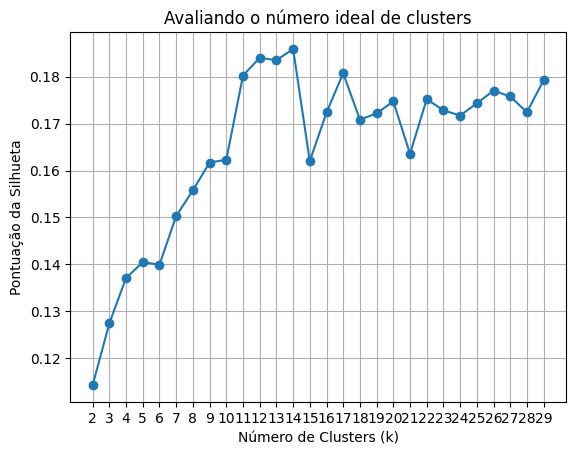

O melhor valor de k (com base na pontuação da silhueta) é: 14


In [76]:
# Avaliando diferentes valores de k com Silhouette Score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # Import silhouette_score


range_n_clusters = range(2, 30)  # Testando k de 2 a 10
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    cluster_labels = kmeans.fit_predict(df_embeddings_sem_descricao)
    silhouette_avg = silhouette_score(df_embeddings_sem_descricao, cluster_labels) # Now it will be recognized
    silhouette_scores.append(silhouette_avg)
    print(f"Para n_clusters = {n_clusters}, a pontuação da silhueta é {silhouette_avg}")

# Plotando os resultados
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Pontuação da Silhueta")
plt.title("Avaliando o número ideal de clusters")
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

# Encontrando o melhor k
best_k = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"O melhor valor de k (com base na pontuação da silhueta) é: {best_k}")


In [77]:
df_embeddings_sem_descricao

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.085207,-0.028585,-0.128406,-0.047568,0.001204,0.057769,0.090508,0.089622,-0.000745,0.057266,...,-0.095369,0.045893,0.043239,-0.010429,-0.107667,-0.057363,0.026364,-0.048209,0.055737,-0.018122
1,-0.033653,-0.023275,-0.106267,-0.040929,-0.072962,-0.006832,-0.082207,0.116418,-0.001470,0.037995,...,-0.015755,0.009748,0.049692,-0.059722,-0.029934,-0.019123,0.035915,0.055009,0.073154,-0.026579
2,-0.069974,0.041621,-0.034030,-0.059641,-0.062987,0.061290,0.054293,-0.002591,0.021149,0.032129,...,-0.035835,-0.032626,0.013860,0.046290,-0.029667,-0.023409,0.123146,-0.030313,0.036544,-0.024273
3,0.014178,-0.005489,-0.025985,-0.057287,-0.020133,-0.037834,0.000950,0.078267,0.051310,0.010813,...,0.021027,0.015892,0.026153,-0.002987,-0.032042,-0.010815,0.007401,0.006238,0.090266,-0.019842
4,-0.057340,0.036806,-0.088870,-0.053818,-0.052722,0.030157,0.055813,-0.024387,0.005800,0.002193,...,-0.007432,-0.061668,0.051572,0.041786,-0.062733,-0.000683,0.133574,0.023327,0.058904,-0.009233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.004072,0.015017,-0.065920,0.013211,-0.014280,0.014355,0.007069,0.021577,0.008206,-0.036362,...,0.026325,-0.012728,-0.028812,-0.031101,0.021910,-0.002059,0.015645,0.016195,-0.057091,-0.017766
496,0.049755,0.033041,-0.086886,-0.062062,-0.058760,0.024894,-0.009095,0.113119,0.003395,0.018665,...,0.084768,-0.011086,-0.008713,0.030783,-0.124173,-0.001284,-0.007035,0.039520,0.092516,-0.064859
497,-0.032200,0.062888,-0.100266,-0.052692,-0.047534,-0.023768,-0.112850,0.035255,-0.058828,0.018937,...,0.057306,-0.082725,0.065641,0.025219,-0.003537,-0.012222,0.089866,0.006919,0.040328,0.056865
498,0.031069,0.031257,-0.066178,-0.002771,-0.026883,0.044149,-0.016009,0.125892,-0.029766,0.003392,...,0.041079,-0.044226,0.007282,0.037412,-0.080164,-0.033276,0.044402,0.069625,0.045200,-0.070519


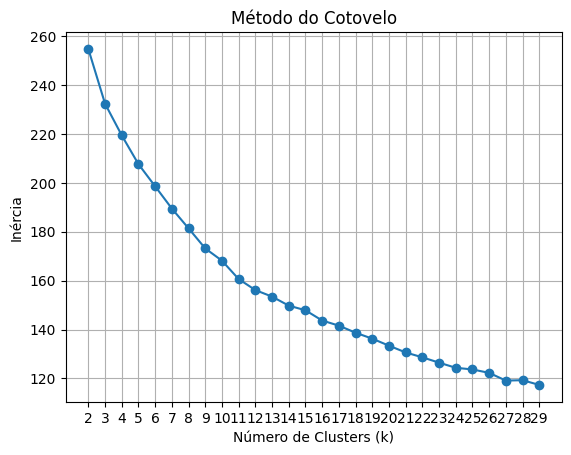

In [78]:
# Código para o método do cotovelo (Elbow Method)

inertia = []
range_n_clusters = range(2, 30)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    kmeans.fit(df_embeddings_sem_descricao)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do método do cotovelo
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia")
plt.title("Método do Cotovelo")
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()


In [79]:
import pandas as pd


num_clusters = 14

kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)
kmeans.fit(df_embeddings_sem_descricao)

# Adicione os rótulos de cluster ao DataFrame
df_embeddings['Cluster'] = kmeans.labels_

# Salve o DataFrame com os clusters em um arquivo CSV
df_embeddings.to_excel('resultados_modelo_14_clusters.xlsx', index=False)

print(f"Resultados salvos em 'resultados_modelo_15_clusters.csv'")


Resultados salvos em 'resultados_modelo_15_clusters.csv'


In [81]:
df_embeddings

,Texto,0,1,2,3,4,5,6,7,8,...,375,376,377,378,379,380,381,382,383,Cluster
0,Monitoramento de taxas de câmbio para garantir...,0.085207,-0.028585,-0.128406,-0.047568,0.001204,0.057769,0.090508,0.089622,-0.000745,...,0.045893,0.043239,-0.010429,-0.107667,-0.057363,0.026364,-0.048209,0.055737,-0.018122,0
1,Coleta e processamento de dados para modelagem...,-0.033653,-0.023275,-0.106267,-0.040929,-0.072962,-0.006832,-0.082207,0.116418,-0.001470,...,0.009748,0.049692,-0.059722,-0.029934,-0.019123,0.035915,0.055009,0.073154,-0.026579,3
2,Precisamos analisar demanda por atendimento pa...,-0.069974,0.041621,-0.034030,-0.059641,-0.062987,0.061290,0.054293,-0.002591,0.021149,...,-0.032626,0.013860,0.046290,-0.029667,-0.023409,0.123146,-0.030313,0.036544,-0.024273,1
3,Previsão de fluxo de caixa com base em padrões...,0.014178,-0.005489,-0.025985,-0.057287,-0.020133,-0.037834,0.000950,0.078267,0.051310,...,0.015892,0.026153,-0.002987,-0.032042,-0.010815,0.007401,0.006238,0.090266,-0.019842,0
4,Uso de dados para detecção de fraudes e reduçã...,-0.057340,0.036806,-0.088870,-0.053818,-0.052722,0.030157,0.055813,-0.024387,0.005800,...,-0.061668,0.051572,0.041786,-0.062733,-0.000683,0.133574,0.023327,0.058904,-0.009233,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Utilização de machine learning para segmentaçã...,-0.004072,0.015017,-0.065920,0.013211,-0.014280,0.014355,0.007069,0.021577,0.008206,...,-0.012728,-0.028812,-0.031101,0.021910,-0.002059,0.015645,0.016195,-0.057091,-0.017766,5
496,Análise de cumprimento regulatório para otimiz...,0.049755,0.033041,-0.086886,-0.062062,-0.058760,0.024894,-0.009095,0.113119,0.003395,...,-0.011086,-0.008713,0.030783,-0.124173,-0.001284,-0.007035,0.039520,0.092516,-0.064859,8
497,redução de custos baseada em dados históricos ...,-0.032200,0.062888,-0.100266,-0.052692,-0.047534,-0.023768,-0.112850,0.035255,-0.058828,...,-0.082725,0.065641,0.025219,-0.003537,-0.012222,0.089866,0.006919,0.040328,0.056865,4
498,Precisamos analisar cumprimento regulatório pa...,0.031069,0.031257,-0.066178,-0.002771,-0.026883,0.044149,-0.016009,0.125892,-0.029766,...,-0.044226,0.007282,0.037412,-0.080164,-0.033276,0.044402,0.069625,0.045200,-0.070519,8


In [83]:
df_embeddings.to_excel('resultados_modelo_14_clusters.xlsx', index=False)

Resultados com redução de dimensionalidade salvos em 'resultados_com_reducao_dimensionalidade.csv'


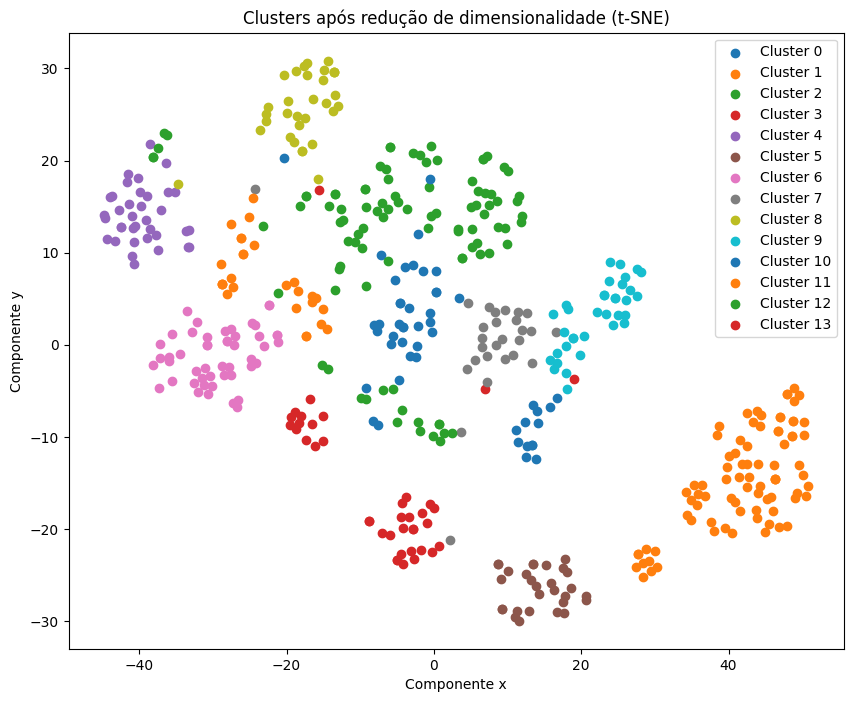

In [84]:

import matplotlib.pyplot as plt

num_clusters = best_k # Use o melhor k encontrado


kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)
kmeans.fit(df_embeddings_sem_descricao)

# Adicione os rótulos de cluster ao DataFrame
df_embeddings['Cluster'] = kmeans.labels_

# Redução de Dimensionalidade (t-SNE) para visualização
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)  # Projeta para 2 dimensões
embeddings_2d = tsne.fit_transform(df_embeddings_sem_descricao)

# Adiciona as coordenadas 2D ao DataFrame
df_embeddings['x'] = embeddings_2d[:, 0]
df_embeddings['y'] = embeddings_2d[:, 1]

df_embeddings.to_csv('resultados_com_reducao_dimensionalidade.csv', index=False)

print(f"Resultados com redução de dimensionalidade salvos em 'resultados_com_reducao_dimensionalidade.csv'")

# Plot dos clusters com redução de dimensionalidade
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    plt.scatter(df_embeddings[df_embeddings['Cluster'] == cluster]['x'],
                df_embeddings[df_embeddings['Cluster'] == cluster]['y'],
                label=f'Cluster {cluster}')
plt.legend()
plt.title('Clusters após redução de dimensionalidade (t-SNE)')
plt.xlabel('Componente x')
plt.ylabel('Componente y')
plt.show()


In [ ]:
!pip install faker